# Python Hierarchical Clustering

This example explains Hierarchical Clustering with Python 3, pandas and scikit-learn on Jupyter Notebook.
## Requirements
To use this example you need Python 3 and latest versions of pandas and scikit-learn. I used Anaconda distribution to install.

### Data Set:
https://catalog.data.gov/dataset/2010-census-populations-by-zip-code

### ML life-cycle:
1.	Business objective connected to it.
2.	Data set, wrangle and prepare it.
3.	What the data is saying

## Hierarchical Clustering
Two type of Hierarchical Clustering.
1.	Agglomerative: bottom up approach 
2.	Divisive: (opposit) starting at top and dividing down into multiple

## Algorithm (Hierarchical - Agglomerative)
1.	Make a individual cluster for each data points. (N cluster)
2.	Cluster togather 2 closest clusters. (N-1 Cluster)
3.	Repeat 2 until only one cluster remaining. (N-2....2,1)
4.	Output: One hudge cluster.
5.	Draw Dendogram as we keep connecting clusters. 
6.	Extend all horizontal lines in Dendogram then find longest vertical line. Intersect this line from middle and check how many lines it is ontersecting. That is K cluster value.

In [2]:
# Hierarchical Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('2010_Census_Populations.csv')
#Data Prepare
# Replacing 0 to NaN
dataset[['Total Population','Median Age']] = dataset[['Total Population','Median Age']].replace(0, np.NaN)
X = dataset.iloc[:, [1, 2]].values
print(X[:20])

# Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X)
X = imputer.transform(X)

print(X[:20])

[[1.00000e+00 7.35000e+01]
 [5.71100e+04 2.66000e+01]
 [5.12230e+04 2.55000e+01]
 [6.62660e+04 2.63000e+01]
 [6.21800e+04 3.48000e+01]
 [3.76810e+04 3.39000e+01]
 [5.91850e+04 3.24000e+01]
 [4.09200e+04 2.40000e+01]
 [3.23270e+04 3.97000e+01]
 [3.80000e+03 3.78000e+01]
 [1.03892e+05 2.62000e+01]
 [3.11030e+04 3.63000e+01]
 [1.17720e+04 4.46000e+01]
 [        nan 4.48000e+01]
 [1.89860e+04 3.13000e+01]
 [4.75960e+04 3.39000e+01]
 [2.37680e+04 2.94000e+01]
 [4.93100e+04 3.32000e+01]
 [6.44580e+04 3.58000e+01]
 [3.89670e+04 3.46000e+01]]
[[1.00000000e+00 7.35000000e+01]
 [5.71100000e+04 2.66000000e+01]
 [5.12230000e+04 2.55000000e+01]
 [6.62660000e+04 2.63000000e+01]
 [6.21800000e+04 3.48000000e+01]
 [3.76810000e+04 3.39000000e+01]
 [5.91850000e+04 3.24000000e+01]
 [4.09200000e+04 2.40000000e+01]
 [3.23270000e+04 3.97000000e+01]
 [3.80000000e+03 3.78000000e+01]
 [1.03892000e+05 2.62000000e+01]
 [3.11030000e+04 3.63000000e+01]
 [1.17720000e+04 4.46000000e+01]
 [3.39646891e+04 4.48000000e+0

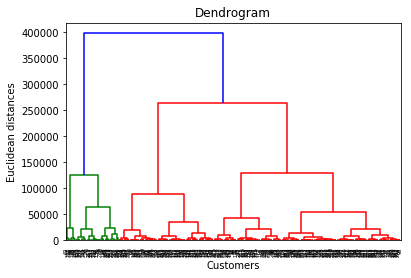

In [4]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()
#Extend all horizontal lines then find longest vertical line. Intersect this line from middle and check how many lines it is ontersecting. That is K

In [10]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

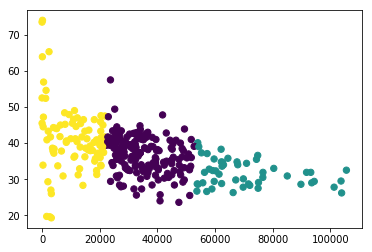

In [12]:
# Scatter chart of the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_hc, s=40, cmap='viridis');

Story: This data is 2010 census data. After clustering using Hierarchical we plotted data which clearly shows most of the population lies around 35 of median age. As population grows median ages is also changing and its coming down. This model gives idea, if business need to manufacture products according to ~age of 40 for 20K population, ~age of 38 for next 30K population, ~age of 35 for 50K.


Ref:

[Python Data Science Handbook](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb)

[Hierarchical Clustering](http://www.google.com/url?q=http%3A%2F%2Fwww.econ.upf.edu%2F~michael%2Fstanford%2Fmaeb7.pdf&sa=D&sntz=1&usg=AFQjCNE07AuJ6qYl5ZFyRX7C0RPOlYyFiA)